<a href="https://colab.research.google.com/github/manmeet3/Deep_Learning2/blob/master/GradientBoostMachines/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The intuition behind gradient boosting is to leverate the pattern in residuals and strengthen a weak prediction model. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from fastai.imports import *
from IPython.display import display
from sklearn import metrics

In [2]:
def std_agg(cnt, s1, s2):
  return math.sqrt((s2/cnt) - (s1/cnt)**2)

# TODO: Add comments

In [45]:
class DecisionTree():
  def __init__(self, x, y, idxs = None, min_leaf=2):
    if idxs is None:
      idxs = np.arange(len(y))
    self.x, self.y, self.idxs, self.min_leaf = x, y, idxs, min_leaf
    self.n, self.c, = len(idxs), x.shape[1]
    self.val = np.mean(y[idxs])
    self.score = float('inf')
    self.find_varsplit()

  def find_varsplit(self):
    for i in range(self.c):
      self.find_better_split(i)
    if self.score == float('inf'):
      return
    x = self.split_col
    left_subtree = np.nonzero(x <= self.split)[0]
    right_subtree = np.nonzero(x > self.split)[0]
    self.left_subtree = DecisionTree(self.x, self.y, self.idxs[left_subtree])
    self.right_subtree = DecisionTree(self.x, self.y, self.idxs[right_subtree])

  def find_better_split(self, var_idx):
    x, y = self.x.values[self.idxs, var_idx], self.y[self.idxs]
    sort_idx = np.argsort(x)
    sort_y, sort_x = y[sort_idx], x[sort_idx]
    right_count, right_sum, right_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
    left_count, left_sum, left_sum2 = 0, 0.0, 0.0

    for i in range(0, self.n - self.min_leaf - 1):
      xi, yi = sort_x[i], sort_y[i]
      left_count += 1
      right_count -= 1
      left_sum += yi
      right_sum -= yi
      left_sum2 += yi**2
      right_sum2 -= yi**2
      if i<self.min_leaf or xi == sort_x[i+1]:
        continue
      
      left_std = std_agg(left_count, left_sum, left_sum2)
      right_std = std_agg(right_count, right_sum, right_sum2)
      curr_score = left_std * left_count + right_std * right_count
      if curr_score < self.score:
        self.var_idx, self.score, self.split = var_idx, curr_score, xi

  @property
  def split_name(self):
    return self.x.columns[self.var_idx]

  @property
  def split_col(self):
    return self.x.values[self.idxs, self.var_idx]

  @property
  def is_left(self):
    return self.score == float('inf')

  def __repr__(self):
    s = f'n: {self.n}; val:{self.val}'
    if not self.is_leaf:
      s += f'; score:{self.score}; split:{self.split}; var{self.split_name}'
    return s

  def predict(self, x):
    return np.array([self.predict_row(xi) for xi in x])

  def predict_row(self, xi):
    if self.is_leaf: 
      return self.val
    t = self.left_subtree if xi[self.var_idx] <= self.split else self.right_subtree
    return t.predict_row(xi)

Create test data by sampling and concatentating a few normal distributions

In [39]:
x = np.arange(0, 50)
x = pd.DataFrame({'x': x})

In [51]:
y1 = np.random.uniform(10, 20, 10)
y2 = np.random.uniform(20, 30, 10)
y3 = np.random.uniform(5, 20, 10)
y4 = np.random.uniform(25, 32, 10)
y5 = np.random.uniform(15, 30, 10)

y = np.concatenate((y1, y2, y3, y4, y5))
y = y[:, None]

In [52]:
x.shape, y.shape

((50, 1), (50, 1))

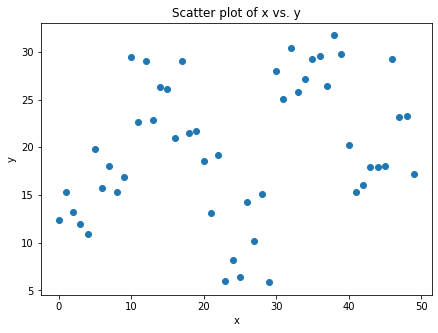

In [54]:
plt.figure(figsize=(7,5))
plt.plot(x,y, 'o')
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Gradient Boosting - Running Decision Trees in a loop

# TODO: Add comments

(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

(50, 1)
(50, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


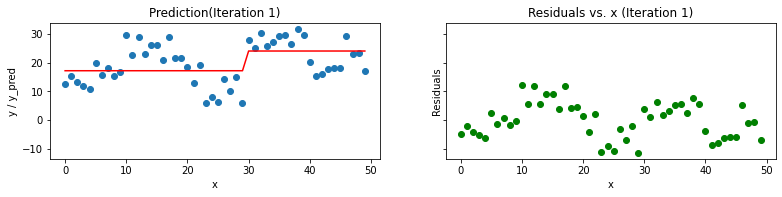

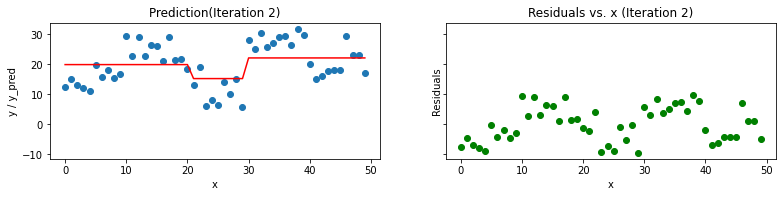

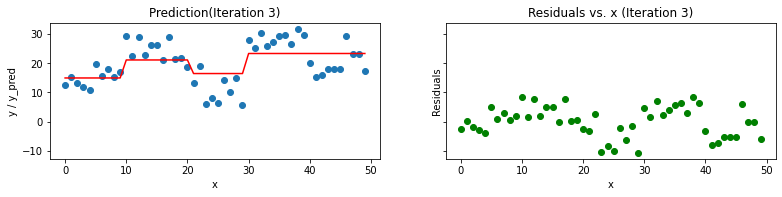

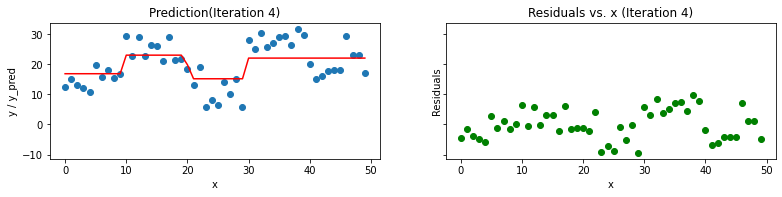

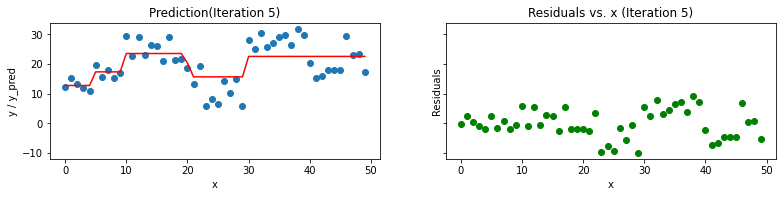

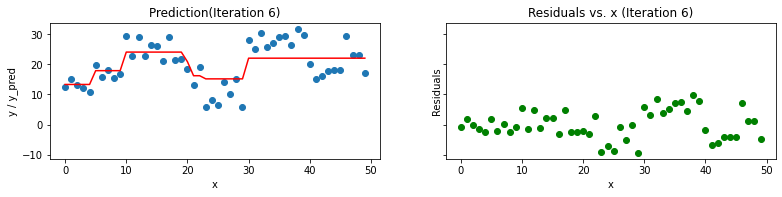

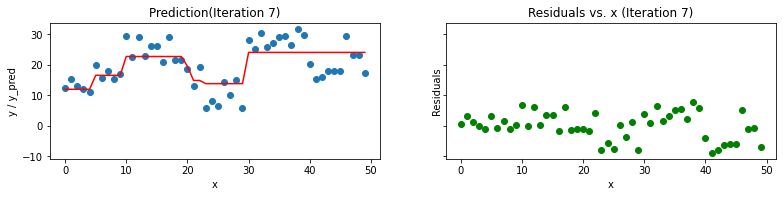

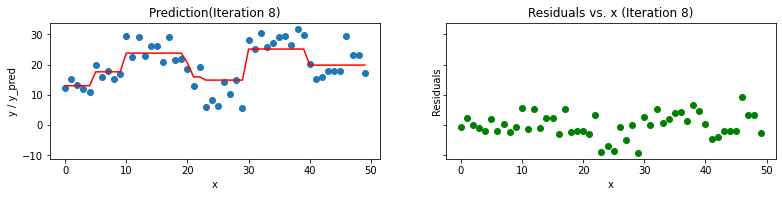

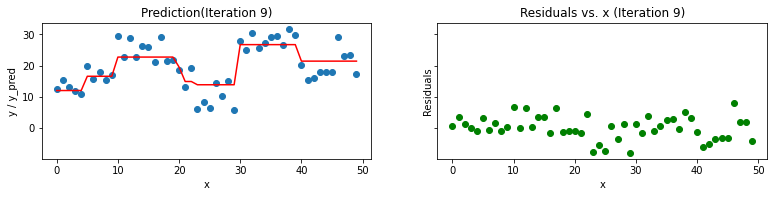

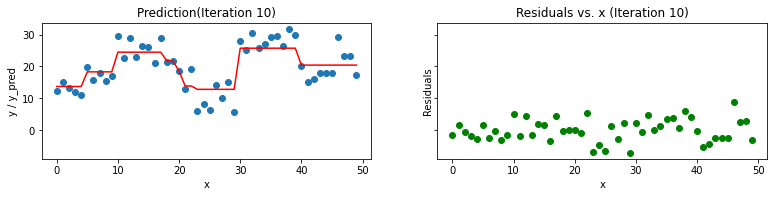

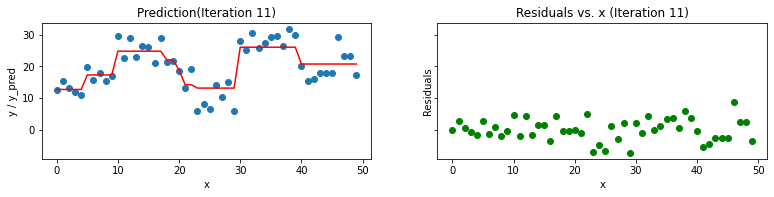

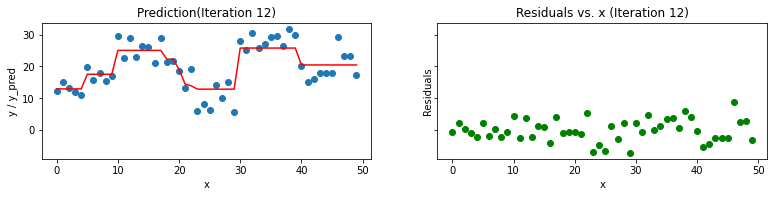

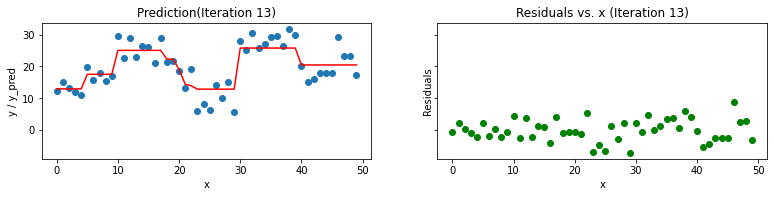

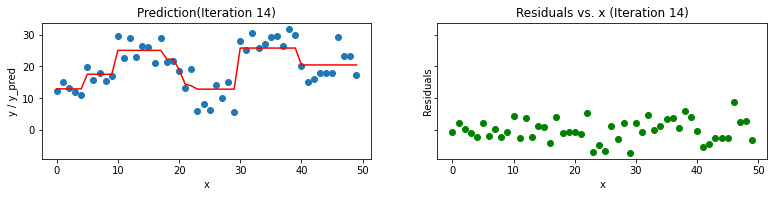

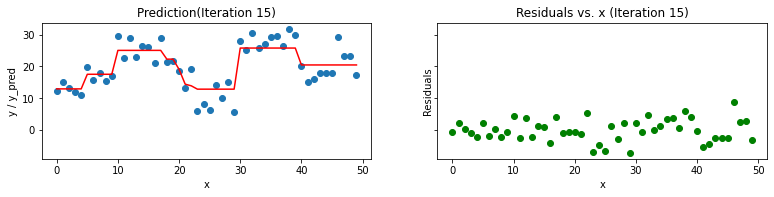

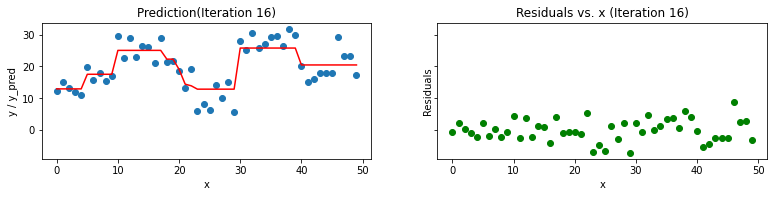

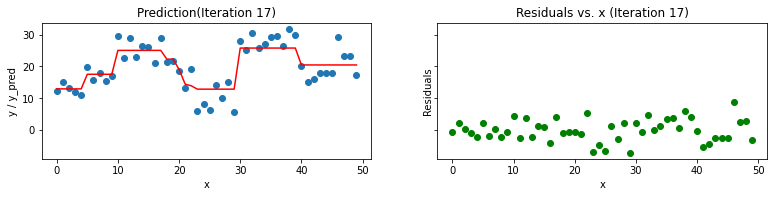

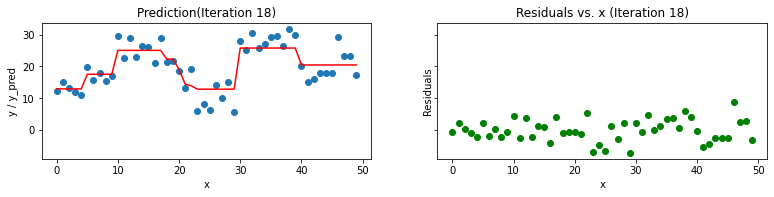

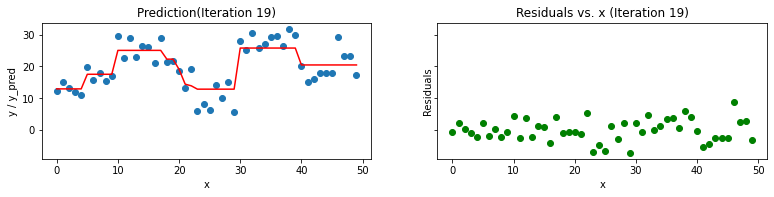

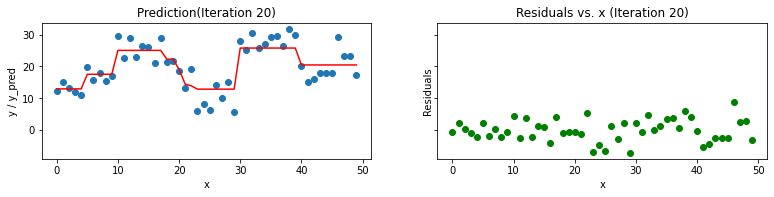

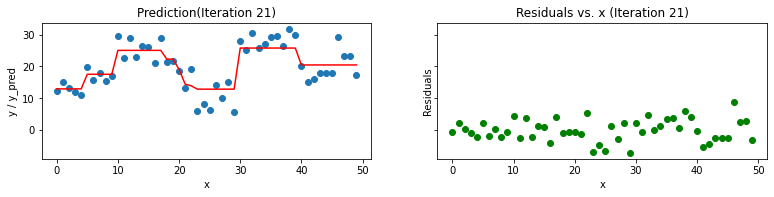

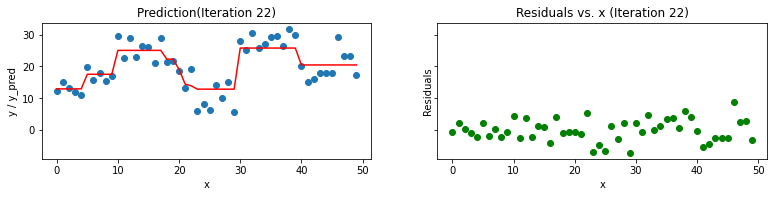

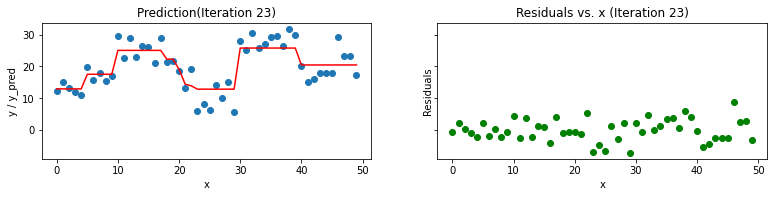

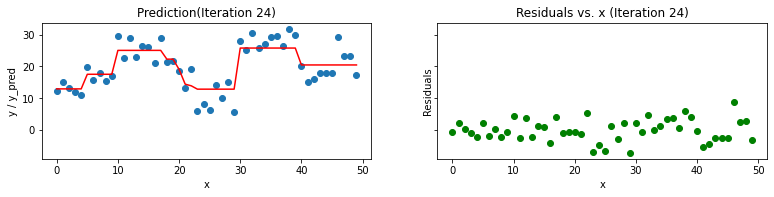

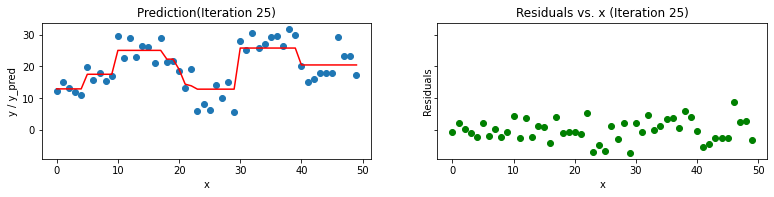

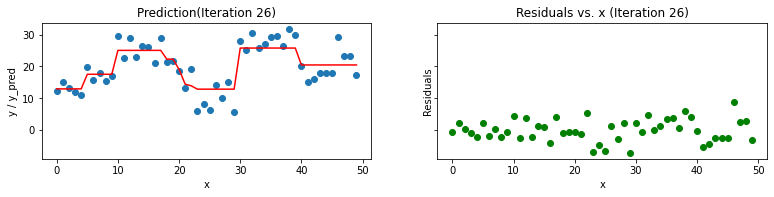

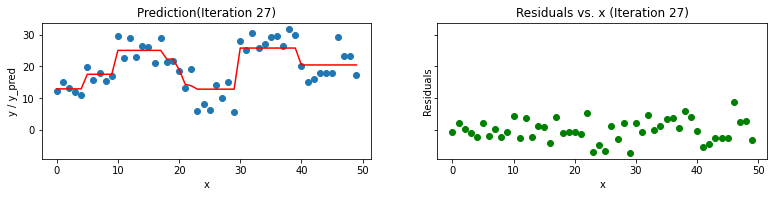

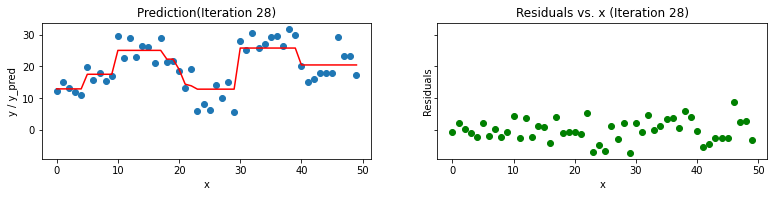

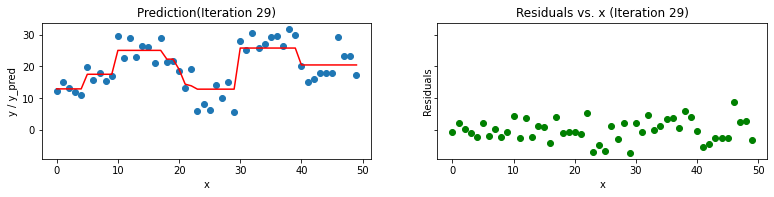

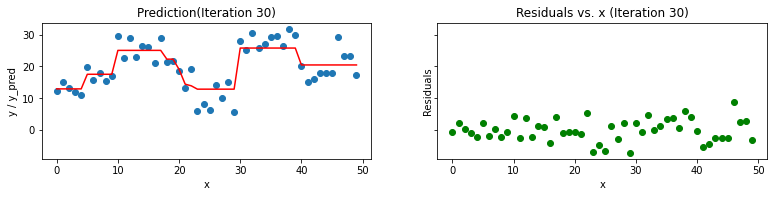

In [68]:
xi = x
yi = y
ei = 0
n = len(yi)
predf = 0

for i in range(30):
    tree = DecisionTree(xi, yi)
    tree.find_better_split(0)

    r = np.where(xi == tree.split)[0][0]

    left_idx = np.where(xi <= tree.split)[0]
    right_idx = np.where(xi > tree.split)[0]

    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))

    predi = predi[:,None]
    predf = predf + predi

    ei = y - predf
    yi = ei

    xa = np.array(x.x)
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(predf)[order]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13, 2.5))

    ax1.plot(x, y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction(Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')

This colab takes inspiration from https://github.com/groverpr/Machine-Learning/blob/master/notebooks/01_Gradient_Boosting_Scratch.ipynb

This is an initial working replication. Will finetune in future